# ResNet50

In [1]:
data_dir = 'C:/Users/DELL/OneDrive/Documents/Folder1/FARMACY/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = 'C:/Users/DELL/OneDrive/Documents/Folder1/FARMACY/FARMACY CODE/test_files'

In [2]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [4]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau


In [5]:

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [6]:
base_model_tf=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=38)


94773248/94765736 [==============================] - 1s 0us/step


In [7]:
#Model building
base_model_tf.trainable=False

pt=Input(shape=(224,224,3))
func=tensorflow.cast(pt,tensorflow.float32)
x=preprocess_input(func) #This function used to zero-center each color channel wrt Imagenet dataset
model_resnet=base_model_tf(x,training=False)
model_resnet=GlobalAveragePooling2D()(model_resnet)
model_resnet=Dense(128,activation='relu')(model_resnet)
model_resnet=Dense(64,activation='relu')(model_resnet)
model_resnet=Dense(38,activation='softmax')(model_resnet)


model_main=Model(inputs=pt,outputs=model_resnet)
model_main.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf.cast (TFOpLambda)         (None, 224, 224, 3)       0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 224, 224, 3)       0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272

In [8]:
#Image augmentation
train_datagen= ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=False,vertical_flip=False
                                  ,fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2)

val_datagen=ImageDataGenerator()

train= train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),
                                         color_mode='rgb',class_mode='categorical',seed=42)

valid=val_datagen.flow_from_directory(directory=valid_dir,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode='categorical')



Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [9]:
#CallBacks
es=EarlyStopping(monitor='val_accuracy',verbose=1,patience=7,mode='auto')
mc=ModelCheckpoint(filepath='C:/Users/DELL/OneDrive/Documents/Folder1/FARMACY/FARMACY CODE/models/cnn',monitor='val_accuracy',verbose=1,save_best_only=True)
lr=ReduceLROnPlateau(monitor='val_accuracy',verbose=1,patience=5,min_lr=0.001)

In [10]:
model_main.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
#Training
model_main.fit(train,validation_data=valid,epochs=30,steps_per_epoch=200,verbose=1,callbacks=[mc,es,lr])

Epoch 1/30
200/200 [==============================] - 198s 967ms/step - loss: 2.3101 - accuracy: 0.3948 - val_loss: 0.5407 - val_accuracy: 0.8417

Epoch 00001: val_accuracy improved from -inf to 0.84168, saving model to /content
Epoch 2/30
200/200 [==============================] - 141s 706ms/step - loss: 0.4988 - accuracy: 0.8482 - val_loss: 0.4210 - val_accuracy: 0.8697

Epoch 00002: val_accuracy improved from 0.84168 to 0.86974, saving model to /content
Epoch 3/30
200/200 [==============================] - 136s 681ms/step - loss: 0.3550 - accuracy: 0.8833 - val_loss: 0.2511 - val_accuracy: 0.9199

Epoch 00003: val_accuracy improved from 0.86974 to 0.91987, saving model to /content
Epoch 4/30
200/200 [==============================] - 139s 696ms/step - loss: 0.2559 - accuracy: 0.9175 - val_loss: 0.3444 - val_accuracy: 0.8877

Epoch 00004: val_accuracy did not improve from 0.91987
Epoch 5/30
200/200 [==============================] - 133s 666ms/step - loss: 0.2451 - accuracy: 0.9213 -

In [12]:
model_main.save("RESNET50_PLANT_DISEASE.h5")

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import Image

Text(0.5, 1.0, 'loss')

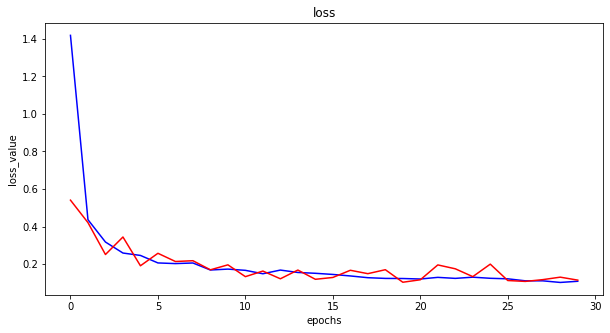

In [14]:
plt.figure(figsize=(10,5))
plt.plot(model_main.history.history['loss'],color='b',label='Training loss')
plt.plot(model_main.history.history['val_loss'],color='r',label='Validation loss')
plt.xlabel("epochs")
plt.ylabel("loss_value")
plt.title("loss")


Text(0.5, 1.0, 'accuracy graph')

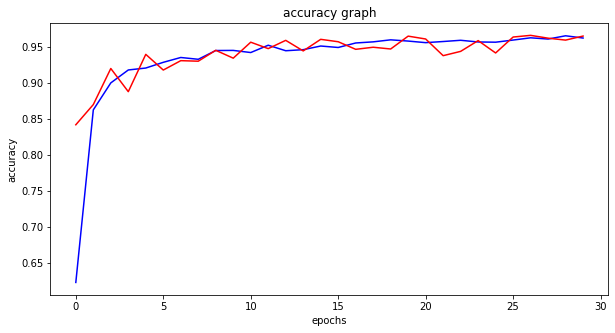

In [15]:
plt.figure(figsize=(10,5))
plt.plot(model_main.history.history['accuracy'],color='b',label='Training accuracy')
plt.plot(model_main.history.history['val_accuracy'],color='r',label='Validation accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy graph")
